In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the dataset
file =pd.read_csv(r'C:\Users\Sonal\ARM.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315000 entries, 0 to 314999
Data columns (total 12 columns):
sno              315000 non-null int64
Ax               315000 non-null float64
Ay               315000 non-null float64
Az               315000 non-null float64
Gx               315000 non-null float64
Gy               315000 non-null float64
Gz               315000 non-null float64
Mx               315000 non-null float64
My               315000 non-null float64
Mz               315000 non-null float64
Activitylabel    315000 non-null object
USERID           315000 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 28.8+ MB


# Data Preprocessing & Feature extraction

In [4]:
#missing value

file.isnull().sum()

sno              0
Ax               0
Ay               0
Az               0
Gx               0
Gy               0
Gz               0
Mx               0
My               0
Mz               0
Activitylabel    0
USERID           0
dtype: int64

In [5]:
df = file
df['A'] = ( df['Ax']**2 + df['Ay']**2 + df['Az']**2 ) **0.5
df['G'] = ( df['Gx']**2 + df['Gy']**2 + df['Gz']**2 ) **0.5
df['M'] = ( df['Mx']**2 + df['My']**2 + df['Mz']**2 ) **0.5

df

,sno,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Activitylabel,USERID,A,G,M
0,0,-1.225800,-9.4389,-0.095342,-0.554050,-1.17870,-1.51310,-4.32,33.84,14.82,walking,U1,9.518640,1.996441,37.194629
1,1,-0.640160,-8.3629,-0.313270,-0.544280,-0.44257,-1.23030,-4.44,33.60,15.06,walking,U1,8.393214,1.416244,37.087426
2,2,-0.068102,-7.5593,-0.408610,-0.514040,-0.36194,-1.06630,-4.56,33.36,15.18,walking,U1,7.570642,1.237834,36.933936
3,3,0.708260,-7.1234,-0.163440,-0.541230,-0.54611,-0.95814,-5.34,32.82,15.54,walking,U1,7.160389,1.228494,36.703673
4,4,0.871700,-7.0281,-0.054481,-0.583070,-0.80176,-0.91538,-5.64,32.52,15.78,walking,U1,7.082162,1.349337,36.583718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314995,314995,1.375700,-8.0905,-3.881800,-0.046426,0.37354,0.51252,-14.22,37.74,2.52,downstairs,U5,9.078387,0.635896,40.408742
314996,314996,1.280300,-7.8181,-3.732000,-0.041844,0.36530,0.50183,-14.04,37.80,2.28,downstairs,U5,8.757264,0.622116,40.387622
314997,314997,0.667400,-7.6546,-3.704700,-0.028711,0.35949,0.48045,-13.44,37.98,1.86,downstairs,U5,8.530130,0.600741,40.330802
314998,314998,0.599300,-7.6819,-3.663900,0.003971,0.41630,0.44166,-13.20,38.10,1.86,downstairs,U5,8.531993,0.606947,40.364707


In [6]:
scaled_X = df

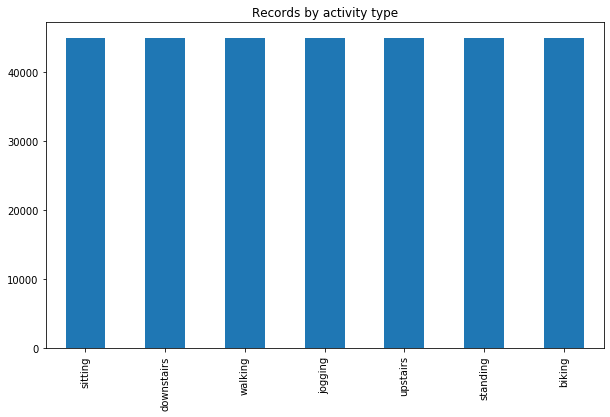

In [7]:
scaled_X['Activitylabel'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 6),align='center');

In [8]:
overlap = .5
data = scaled_X

wsize = 50 * 5


newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]

newdata = newdataset.rolling(wsize, int(wsize/2)).mean().add_suffix('_mean')
data = data.join(newdata)

data = data.iloc[int(wsize*overlap)::int(wsize*overlap)]

data = data.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data

,sno,Activitylabel,USERID,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,My_mean,Mz_mean,A_mean,G_mean,M_mean
125,125,walking,U1,0.369696,-9.252332,-1.166481,-0.046169,-0.075368,-0.088371,-4.908571,34.658571,16.99381,9.460310,1.451540,39.426465
250,250,walking,U1,0.289515,-9.414820,-1.266581,-0.026032,-0.001558,0.024404,-6.820560,34.104000,16.18248,9.632321,1.468322,39.064579
375,375,walking,U1,0.172107,-9.497464,-1.382246,-0.002914,0.074330,0.163231,-8.615040,35.696160,16.21440,9.756686,1.540695,40.887966
500,500,walking,U1,0.156853,-9.428449,-1.280203,-0.029349,-0.058294,0.004568,-7.541520,36.049200,15.41688,9.683244,1.673910,40.783188
625,625,walking,U1,0.225992,-9.464024,-1.323356,-0.050657,-0.105220,-0.080039,-5.851200,34.025520,16.13928,9.703470,1.691368,38.939867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,0.584859,-9.033080,-2.297915,-0.000599,0.128790,0.034433,-12.533280,43.106400,-6.36312,9.534912,0.813691,46.664962
314500,314500,downstairs,U5,0.417273,-9.179410,-2.281733,-0.007173,0.081639,0.006040,-6.441360,42.399600,-9.02352,9.620875,0.770731,44.073222
314625,314625,downstairs,U5,0.682216,-9.017758,-2.532675,-0.024459,0.651668,0.169901,1.551840,39.557520,5.17440,9.591425,1.008540,44.715320
314750,314750,downstairs,U5,0.812481,-8.964338,-2.675582,-0.027088,0.535861,0.165169,4.120080,41.719440,21.24480,9.619020,1.045670,49.724466


In [9]:
data1 = scaled_X

In [10]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]



newdata = newdataset.rolling(wsize, int(wsize/2)).var().add_suffix('_var')
data1 = data1.join(newdata)


data1 = data1.iloc[int(wsize*overlap)::int(wsize*overlap)]
data1 = data1.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data1

,sno,Activitylabel,USERID,Ax_var,Ay_var,Az_var,Gx_var,Gy_var,Gz_var,Mx_var,My_var,Mz_var,A_var,G_var,M_var
125,125,walking,U1,1.190442,3.504331,1.252107,0.159324,1.163226,1.440828,25.619542,12.134964,6.568886,3.533253,0.655299,3.654713
250,250,walking,U1,1.308031,3.593453,1.199060,0.151054,1.234592,1.448182,38.200753,10.372280,9.773894,3.635964,0.670481,3.561987
375,375,walking,U1,1.675097,3.932128,1.492257,0.192200,1.368051,1.520232,40.270478,14.487021,12.846818,4.036359,0.729515,6.877188
500,500,walking,U1,1.637145,4.206692,1.724875,0.239346,1.477771,1.912867,44.200327,17.260726,14.880063,4.349796,0.821054,6.894428
625,625,walking,U1,1.236457,4.186297,1.721963,0.220049,1.500349,1.940347,39.923254,14.461025,13.433306,4.346286,0.808652,3.696775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,3.367386,11.169632,2.129719,0.139442,0.657783,0.120043,83.788986,11.115840,33.050867,12.956347,0.270360,5.581614
314500,314500,downstairs,U5,2.189019,14.047263,2.079104,0.159555,0.537076,0.129374,10.244578,10.230565,14.033054,15.384405,0.236373,12.612833
314625,314625,downstairs,U5,2.120873,8.809387,1.932589,0.127053,0.687514,0.132061,125.368878,10.878820,284.481247,9.051989,0.381350,13.620643
314750,314750,downstairs,U5,2.769669,9.641678,2.211925,0.162908,0.831032,0.145934,85.548165,22.644127,164.536864,10.258489,0.358484,7.975867


In [11]:
datanew = pd.merge(data, data1, on="sno")
datanew = datanew.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew.columns

Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_mean', 'Ay_mean', 'Az_mean',
       'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean',
       'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var',
       'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var',
       'M_var'],
      dtype='object')

In [12]:
data2 = scaled_X

In [13]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).std().add_suffix('_std')
data2 = data2.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data2 = data2.iloc[int(wsize*overlap)::int(wsize*overlap)]
data2 = data2.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data2

,sno,Activitylabel,USERID,Ax_std,Ay_std,Az_std,Gx_std,Gy_std,Gz_std,Mx_std,My_std,Mz_std,A_std,G_std,M_std
125,125,walking,U1,1.091074,1.871986,1.118976,0.399154,1.078530,1.200345,5.061575,3.483528,2.562984,1.879695,0.809505,1.911730
250,250,walking,U1,1.143692,1.895641,1.095016,0.388656,1.111122,1.203404,6.180676,3.220602,3.126323,1.906820,0.818829,1.887323
375,375,walking,U1,1.294255,1.982959,1.221580,0.438406,1.169637,1.232977,6.345902,3.806182,3.584246,2.009069,0.854117,2.622439
500,500,walking,U1,1.279510,2.051022,1.313345,0.489230,1.215636,1.383064,6.648333,4.154603,3.857468,2.085617,0.906120,2.625724
625,625,walking,U1,1.111961,2.046044,1.312236,0.469093,1.224887,1.392963,6.318485,3.802765,3.665147,2.084775,0.899251,1.922700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,1.835044,3.342100,1.459356,0.373420,0.811038,0.346472,9.153632,3.334043,5.748988,3.599493,0.519961,2.362544
314500,314500,downstairs,U5,1.479533,3.747968,1.441910,0.399443,0.732855,0.359686,3.200715,3.198525,3.746072,3.922296,0.486182,3.551455
314625,314625,downstairs,U5,1.456322,2.968061,1.390176,0.356445,0.829165,0.363403,11.196824,3.298306,16.866572,3.008652,0.617536,3.690616
314750,314750,downstairs,U5,1.664232,3.105105,1.487254,0.403618,0.911610,0.382013,9.249225,4.758585,12.827192,3.202888,0.598735,2.824158


In [14]:
data3 = scaled_X

In [15]:
overlap = .5
data3 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).median().add_suffix('_median')
data3 = data3.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data3 = data3.iloc[int(wsize*overlap)::int(wsize*overlap)]
data3 = data3.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data3

,sno,Activitylabel,USERID,Ax_median,Ay_median,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
125,125,walking,U1,0.47671,-8.69660,-1.007895,0.057574,0.133475,-0.048258,-6.00,35.25,16.50,9.171509,1.350828,39.737890
250,250,walking,U1,0.38137,-9.26865,-1.341600,0.070708,0.189065,0.309405,-7.62,34.62,15.69,9.553020,1.369448,39.234839
375,375,walking,U1,0.23836,-9.45935,-1.348400,0.102320,0.333380,0.432035,-9.45,35.73,15.57,9.861367,1.459911,41.686463
500,500,walking,U1,0.22474,-9.38440,-1.130500,0.101095,0.238545,0.330780,-7.86,35.97,14.70,9.703135,1.664323,41.579329
625,625,walking,U1,0.31327,-9.40485,-1.246300,0.075900,0.153630,0.158975,-6.03,34.47,16.56,9.714375,1.652849,39.058519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,0.49033,-8.30840,-2.165600,0.046884,0.084910,0.041233,-9.51,43.08,-7.62,8.717974,0.673802,46.857629
314500,314500,downstairs,U5,0.51076,-8.04965,-2.111150,0.056963,-0.007330,0.012522,-6.30,41.58,-9.27,8.412489,0.645379,42.713300
314625,314625,downstairs,U5,0.71507,-8.32200,-2.458500,0.053298,0.627055,0.173945,-3.15,38.58,-3.84,9.159577,0.871894,44.999738
314750,314750,downstairs,U5,0.87170,-8.29480,-2.499300,0.005956,0.564285,0.184020,0.00,40.95,23.79,9.111423,0.952650,49.770315


In [16]:
datanew1 = pd.merge(data2, data3, on="sno")
datanew1 = datanew1.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew1.columns


Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_std', 'Ay_std', 'Az_std',
       'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std',
       'G_std', 'M_std', 'Ax_median', 'Ay_median', 'Az_median', 'Gx_median',
       'Gy_median', 'Gz_median', 'Mx_median', 'My_median', 'Mz_median',
       'A_median', 'G_median', 'M_median'],
      dtype='object')

In [17]:
datanew2 = pd.merge(datanew, datanew1, on="sno")
datanew2 = datanew2.drop(['Activitylabel_x_y','USERID_x_y'],axis=1)
datanew2

,sno,Activitylabel_x_x,USERID_x_x,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,...,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
0,125,walking,U1,0.369696,-9.252332,-1.166481,-0.046169,-0.075368,-0.088371,-4.908571,...,-1.007895,0.057574,0.133475,-0.048258,-6.00,35.25,16.50,9.171509,1.350828,39.737890
1,250,walking,U1,0.289515,-9.414820,-1.266581,-0.026032,-0.001558,0.024404,-6.820560,...,-1.341600,0.070708,0.189065,0.309405,-7.62,34.62,15.69,9.553020,1.369448,39.234839
2,375,walking,U1,0.172107,-9.497464,-1.382246,-0.002914,0.074330,0.163231,-8.615040,...,-1.348400,0.102320,0.333380,0.432035,-9.45,35.73,15.57,9.861367,1.459911,41.686463
3,500,walking,U1,0.156853,-9.428449,-1.280203,-0.029349,-0.058294,0.004568,-7.541520,...,-1.130500,0.101095,0.238545,0.330780,-7.86,35.97,14.70,9.703135,1.664323,41.579329
4,625,walking,U1,0.225992,-9.464024,-1.323356,-0.050657,-0.105220,-0.080039,-5.851200,...,-1.246300,0.075900,0.153630,0.158975,-6.03,34.47,16.56,9.714375,1.652849,39.058519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,314375,downstairs,U5,0.584859,-9.033080,-2.297915,-0.000599,0.128790,0.034433,-12.533280,...,-2.165600,0.046884,0.084910,0.041233,-9.51,43.08,-7.62,8.717974,0.673802,46.857629
2515,314500,downstairs,U5,0.417273,-9.179410,-2.281733,-0.007173,0.081639,0.006040,-6.441360,...,-2.111150,0.056963,-0.007330,0.012522,-6.30,41.58,-9.27,8.412489,0.645379,42.713300
2516,314625,downstairs,U5,0.682216,-9.017758,-2.532675,-0.024459,0.651668,0.169901,1.551840,...,-2.458500,0.053298,0.627055,0.173945,-3.15,38.58,-3.84,9.159577,0.871894,44.999738
2517,314750,downstairs,U5,0.812481,-8.964338,-2.675582,-0.027088,0.535861,0.165169,4.120080,...,-2.499300,0.005956,0.564285,0.184020,0.00,40.95,23.79,9.111423,0.952650,49.770315


In [18]:

df = datanew2.loc[datanew2['Activitylabel_x_x'] == 'jogging']

df

,sno,Activitylabel_x_x,USERID_x_x,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,...,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
143,18000,jogging,U1,0.795374,-9.335609,-1.187037,-0.000210,0.006988,0.000525,13.35888,...,-1.18500,-0.000916,0.009010,0.000611,13.38,39.84,-12.54,9.443794,0.017654,43.858481
144,18125,jogging,U1,0.346885,-9.129453,-1.516162,-0.046139,0.011122,0.111133,16.34856,...,-1.19860,-0.005345,0.006109,0.003360,13.44,39.60,-12.48,9.432873,0.026142,43.673118
145,18250,jogging,U1,-1.791627,-8.438439,-2.495248,-0.041971,-0.060108,0.095121,23.72088,...,-1.22580,-0.039401,0.017563,0.101707,22.98,35.70,-0.93,9.437492,1.305436,42.525674
146,18375,jogging,U1,-3.643817,-7.473214,-2.946469,0.027878,-0.110864,0.037398,28.77720,...,-0.49033,0.016188,0.191810,0.198070,29.04,32.04,2.34,10.409289,2.453820,43.606648
147,18500,jogging,U1,-3.857818,-7.531339,-2.677597,0.051246,-0.011339,0.124523,27.96432,...,-0.46309,0.103236,0.093768,0.353690,27.93,30.33,1.32,10.216553,2.391746,42.624753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,278375,jogging,U5,-1.293878,-8.226283,-4.236024,-0.024578,0.028705,0.142825,-13.58520,...,-3.10545,-0.109805,0.530230,0.675310,-13.80,32.52,29.01,11.424131,3.129615,45.905117
2227,278500,jogging,U5,-1.412313,-8.233551,-4.176707,0.015969,-0.103740,0.036387,-15.85056,...,-3.21440,0.001527,0.291080,0.460285,-15.45,29.43,28.86,11.379342,3.023317,43.884390
2228,278625,jogging,U5,-1.183660,-8.176504,-4.186247,0.041182,0.040042,0.168693,-18.93744,...,-3.26890,0.078496,0.468840,0.610865,-18.66,27.96,28.02,11.562920,3.028541,44.205221
2229,278750,jogging,U5,-1.055634,-8.509869,-4.301908,0.076462,-0.101071,0.064984,-19.11816,...,-3.50720,0.097585,0.431730,0.424855,-19.08,28.32,29.25,11.855521,3.168562,45.724999


In [19]:
datanew2.to_csv('newexp.csv')

# split into train and test set

In [20]:
X = datanew2[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean',
       'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean', 'A_mean',
       'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var', 'Gy_var',
       'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var', 'M_var',
       'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std',
       'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std', 'Ax_median', 'Ay_median',
       'Az_median', 'Gx_median', 'Gy_median', 'Gz_median', 'Mx_median',
       'My_median', 'Mz_median', 'A_median', 'G_median', 'M_median']]
y = datanew2['Activitylabel_x_x']

In [21]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify = y)
X_train.shape

(2015, 48)

# train model without feature selection

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
import scikitplot as skplt
from time import time

ModuleNotFoundError: No module named 'scikitplot'

In [23]:
#train the model with extreme gradient boosting

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
t0=time()
lgb.fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")
t1=time()
y_predict = lgb.predict(X_test)
print ("predict time:", round(time()-t1, 3), "s")


# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)



ModuleNotFoundError: No module named 'lightgbm'

In [24]:
#train with random forest

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
t0=time()
rnd_clf = rnd_clf.fit(X_train, Y_train)
print ("training time:", round(time()-t0, 3), "s")

#evaluate accuracy
t1=time()
y_predict = rnd_clf.predict(X_test)
print ("predict time:", round(time()-t1, 3), "s")



# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy2)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)



NameError: name 'time' is not defined

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


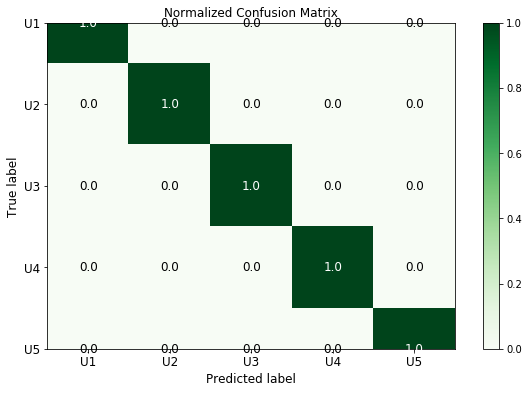

In [143]:
#train with decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

dr = DecisionTreeClassifier()
dr = dr.fit(X_train, Y_train)
y_predict = dr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy3)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)


skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=True,figsize = (10,6), cmap = 'Greens',title_fontsize = 'large',text_fontsize='large')


plt.show()
# result = confusion_matrix(Y_test, y_predict)
# print(result)






# feature selection by RFE

In [25]:
#feature selection through RFE by using gradientboosting classifier
from sklearn.feature_selection import RFE

sel = RFE(RandomForestClassifier(n_estimators=100, random_state = 0), n_features_to_select = 7)
sel.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [26]:
features = X_train.columns[sel.get_support()]
features

Index(['Ay_mean', 'Ay_var', 'Az_var', 'A_var', 'Ay_std', 'Ax_median',
       'G_median'],
      dtype='object')

In [27]:
#train by random forest
def run_RandomForestClassifier(X_train,X_test,Y_train,Y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs=-1)
    t0=time()
    clf.fit(X_train, Y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1=time()
    y_predict = clf.predict(X_test)
    print ("predict time:", round(time()-t1, 3), "s")
    return(accuracy_score(Y_test, y_predict))

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
ar = run_RandomForestClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ar)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)



training time: 0.442 s
predict time: 0.107 s
Accuracy: 0.958333
Precision: 0.966660
Recall: 0.966270
F1 score: 0.966234


In [148]:
# train by decisiontree
def run_DecisionTreeClassifier(X_train,X_test,Y_train,Y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)



Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


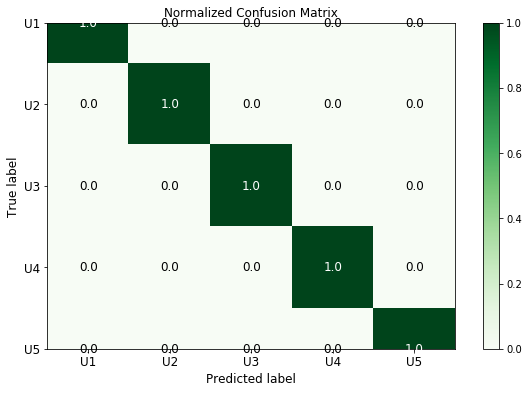

Wall time: 467 ms


In [149]:
%%time
ad = run_DecisionTreeClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ad)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=True,figsize = (10,6), cmap = 'Greens',title_fontsize = 'large',text_fontsize='large')


plt.show()

In [28]:
import lightgbm as lgb
from lightgbm import LGBMClassifier 
def run_LGBMClassifier(X_train,X_test,Y_train,Y_test):
    clf = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
    t0=time()
    clf.fit(X_train, Y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1=time()
    y_predict = clf.predict(X_test)
    print ("predict time:", round(time()-t1, 3), "s")
    return (accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
lgm = run_LGBMClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % lgm)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)




training time: 0.666 s
predict time: 0.012 s
Accuracy: 0.904762
Precision: 0.966660
Recall: 0.966270
F1 score: 0.966234


# comparison chart with feature selection and without feature selection on different classifier

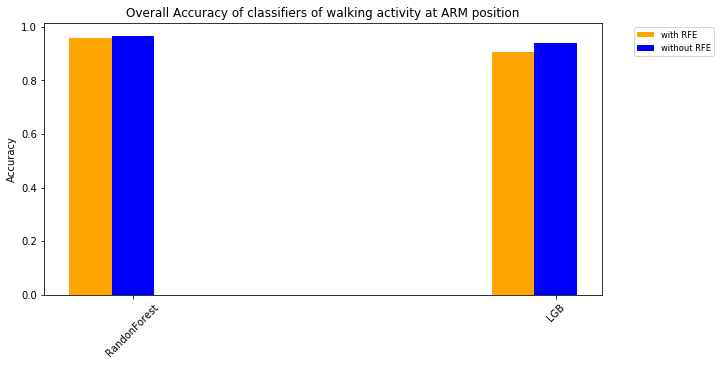

In [29]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np


Out_Accuracy2 = [ar,lgm]
Out_Accuracy3 = [accuracy2,accuracy1]
Model_2 = ['RandonForest','LGB']

ind =  np.arange(2)   # the x locations for the groupsx
width = 0.1  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind, Out_Accuracy2, width, color='orange',label ='with RFE')
rects2 = ax.bar(ind + width ,Out_Accuracy3, width, color='b',label = 'without RFE')

ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy of classifiers of walking activity at ARM position')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_2,rotation=45)
plt.legend(handles=[rects1, rects2], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()